<a href="https://colab.research.google.com/github/xtianu/temporal_DAPR/blob/main/Example_1_PCA_on_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXAMPLE 1:** PCA on images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image



### Pillow is a library to rezise images

In [3]:
pip install pillow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


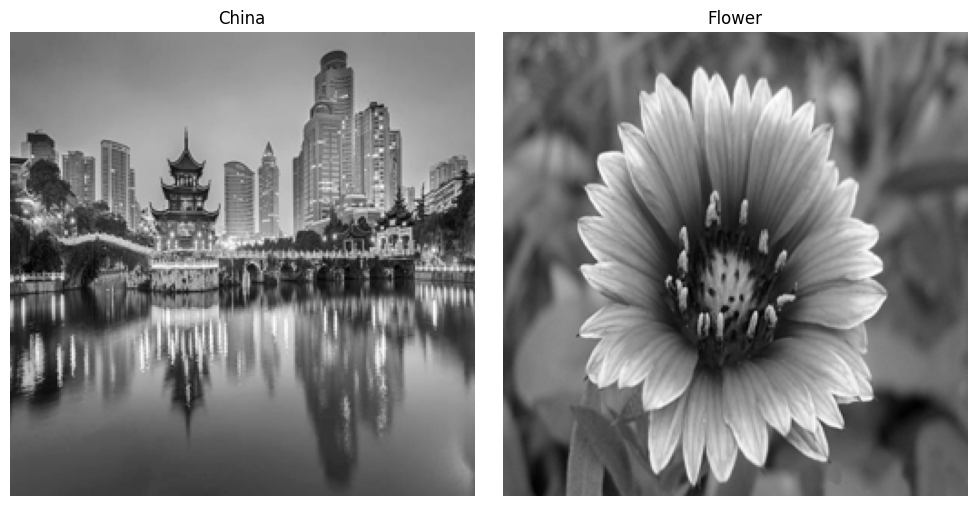

In [16]:
# Select the drive folder
from google.colab import drive
drive.mount('/content/drive')

# Load images using Pillow (you can replace the paths with your own image files)
china = Image.open('/content/drive/MyDrive/DAPR/Lab/input/china.jpg')
flower = Image.open('/content/drive/MyDrive/DAPR/Lab/input/flower.jpg')

#  Resize images to the same size (e.g., 256x256)
new_size = (256, 256)
china_resized = china.resize(new_size)
flower_resized = flower.resize(new_size)

# Convert images to grayscale
china_gray = china_resized.convert('L')
flower_gray = flower_resized.convert('L')

# Convert images to NumPy arrays and normalize
china_array = np.array(china_gray) / 255.0
flower_array = np.array(flower_gray) / 255.0

# Flatten the 2D images to 1D arrays
china_flat = china_array.flatten()
flower_flat = flower_array.flatten()

# Stack images into a data matrix (rows=images, columns=pixels)
X = np.vstack([china_flat, flower_flat])

# Create a plot with two subplots side by side
plt.figure(figsize=(10, 5))

# Display first image
plt.subplot(1, 2, 1)
plt.imshow(china_array, cmap='gray')
plt.title("China")
plt.axis('off')

# Display second image
plt.subplot(1, 2, 2)
plt.imshow(flower_array, cmap='gray')
plt.title("Flower")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# Standardize data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# Apply PCA (reduce n_components to 2, because we have 2 images)
n_components = 1  # Must be between 0 and min(n_samples, n_features), so here it's 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Inverse transform the PCA-reduced data back to original space
X_reconstructed = pca.inverse_transform(X_pca)

# Reshape reconstructed images back to original dimensions
china_reconstructed = X_reconstructed[0].reshape(new_size)
flower_reconstructed = X_reconstructed[1].reshape(new_size)


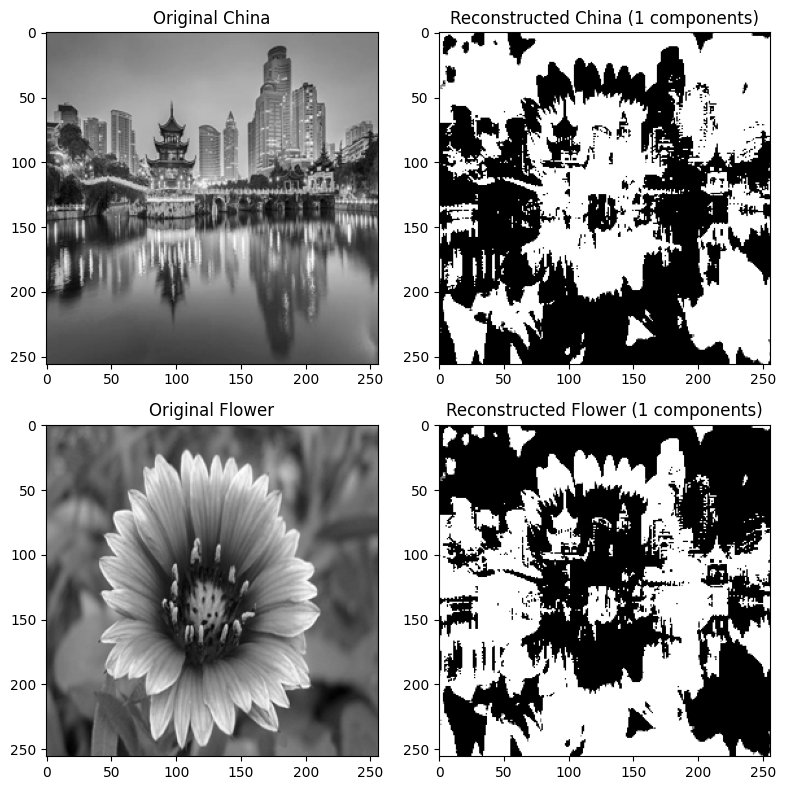

In [18]:
# Plot original and reconstructed images
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0, 0].imshow(china_array, cmap='gray')
axes[0, 0].set_title('Original China')
axes[0, 1].imshow(china_reconstructed, cmap='gray')
axes[0, 1].set_title(f'Reconstructed China ({n_components} components)')

axes[1, 0].imshow(flower_array, cmap='gray')
axes[1, 0].set_title('Original Flower')
axes[1, 1].imshow(flower_reconstructed, cmap='gray')
axes[1, 1].set_title(f'Reconstructed Flower ({n_components} components)')

plt.tight_layout()
plt.show()
